In [15]:
import keras, os, pickle, re, sklearn, string, tensorflow
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.layers import Embedding
from keras.optimizers import Adadelta, adam
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils.vis_utils  import plot_model

print('Keras version: \t\t%s' % keras.__version__)
print('Scikit version: \t%s' % sklearn.__version__)
print('TensorFlow version: \t%s' % tensorflow.__version__)


Keras version: 		2.0.9
Scikit version: 	0.19.1
TensorFlow version: 	1.4.1


In [16]:
import nltk
from nltk.corpus import stopwords
from tika import parser
from sklearn.metrics import classification_report



In [17]:
def LoadData_tech():
    label_tech=[]
    i=0
    for file in os.listdir("/home/shabna/Desktop/example_codes/new_sample/level2/tech_mix"):
        try:
            print (i, file)
            parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level2/tech_mix/"+file)

            tech_contents=clean_doc(parsedPDF['content'])
            #Data = resume_contents.encode('utf-8')    
            label_tech.append((tech_contents,'Technical field'))
        except UnicodeEncodeError:
            print ('Unicode error:', file)
        i=i+1
    #print (label_resume)
    return(label_tech)
        

In [18]:
def LoadData_nontech():
    label_nontech=[]
    i=1
    for file in os.listdir("/home/shabna/Desktop/example_codes/new_sample/level2/nontech_mix"):
        try:
            print (i, file)
            parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level2/nontech_mix/"+file)
        
            nontech_contents=clean_doc(parsedPDF['content'])
       
            
            label_nontech.append((nontech_contents, 'Non-Technical field'))
        except UnicodeEncodeError:
            print ('Unicode error:', file)
        i=i+1
            
    return(label_nontech)

In [21]:
#Preprocessing
def clean_doc(doc):
    """
    Cleaning a document by several methods:
        - Lowercase
        - Removing whitespaces
        - Removing stopwords
        - Removing punctuations
        
    """
    stop_words = set(stopwords.words('english'))
    
    # Lowercase
    doc = doc.lower()
    # Removing multiple whitespaces
    doc = re.sub(r"\?", " \? ", doc)
    # Remove numbers
    #doc = re.sub(r"[0-9]+", "", doc)
    # Split in tokens
    tokens = doc.split()
    # Remove Stopwords
    tokens = [w for w in tokens if not w in stop_words]
    # Remove punctuation
    tokens = [w.translate(str.maketrans('', '', string.punctuation)) for w in tokens]
    # Tokens with less then two characters will be ignored
    #tokens = [word for word in tokens if len(word) > 1]
    return ' '.join(tokens)

In [22]:
label_tech=LoadData_tech()

0 BrettJohnsonProfile.pdf
1 RAHUL_KUMAR_Delhi_4.08_yrs.doc
2 Akshay_Chaudhary_Pune_10.06_yrs.doc
3 Maria ChristineJohnsonProfile.pdf
4 jasmendar_kumar_Delhi_3.00_yrs.doc
5 Binoj_P_Bengaluru___Bangalore_7.09_yrs.docx
6 3d Character Animator Resume.doc
7 HardikRathoreProfile.pdf
8 Abhilash Rajan.doc
9 83604512_Chennai_12.00_yrs.doc
10 Cisco-Network-Engineer-Resume-Template-Free-Download.doc
11 HelenHarbord FISTCProfile.pdf
12 GOBI.pdf
13 PiyushPranavProfile.pdf
14 AtifRizviProfile.pdf
15 Content Writer -Interested.docx
16 CostantinoMontanariProfile.pdf
17 CV_Vibin.docx
18 BabarShahProfile.pdf
19 Prem Hans RajSinghProfile.pdf
20 AtaHaghdarProfile.pdf
21 AnjuRachelThomas[1_0].docx
22 Deepa_Chandru_Chennai_7.01_yrs.doc
23 RAJESHCHAMANTHULAProfile.pdf
24 Kalpesh_gurav_Thane_1.00_yrs.docx
25 FarshadBAGHERIANProfile.pdf
26 Febajacob[2_0].docx
27 ManjunathMProfile.pdf
28 NikitaPuzereyProfile.pdf
29 Raju_Jinukala_Hyderabad___Secunderabad_2.08_yrs.doc
30 PreetiKusnoorProfile.pdf
31 mamatha_gogi_H

241 Prathibha__Chilakaraju_Hyderabad___Secunderabad_7.00_yrs.doc
242 SharabhKaushalProfile.pdf
243 56550931_Hyderabad___Secunderabad_5.09_yrs.doc
244 45614955_Pune_9.10_yrs.docx
245 MichelleCherianProfile.pdf
246 KavithaPatchamalaiProfile.pdf
247 satishghinaiyaProfile.pdf
248 Harshada_Bhalerao_Pune_1.11_yrs.docx
249 ANOOP JOY.doc
250 Cisco-Network-Engineer-Resume-Free-PDF-Template.pdf
251 Hardik_Patel_Baroda_3.11_yrs.pdf
252 Muhammed Insaf.doc
253 ShaikHussainProfile.pdf
254 JulianTokerProfile.pdf
255 25029877_Bengaluru___Bangalore_9.00_yrs.doc
256 Dhameemul ansariMProfile.pdf
257 Liza BarooahGogoiProfile.pdf
258 RobinSharmaProfile.pdf
259 CarlaMaglioneProfile.pdf
260 FedericoBianchiniProfile.pdf
261 KaranBalwani[5_0].docx
262 Nagaraju[7_0].docx
263 Aswin.doc
264 AnuSPillai[4_1].pdf
265 62665768_Bengaluru___Bangalore_4.03_yrs.docx
266 dinil___Kannur_1.03_yrs.docx
267 FedericaDel FiaccoProfile.pdf
268 Anil Reddy.Singam_Oracle Developer_Hyderabad_Atlas Systems.doc
269 ArunaZachariahProfi

475 DivyakaushikProfile.pdf
476 AnoopaSebastian[2_0].doc
477 anilvishnu1(sh)15thJan'16.docx
478 sojuvarughesethomas[2_3].docx
479 shreya_choudhary_Bengaluru___Bangalore_2.00_yrs.doc
480 Saran_kumar_Bengaluru_-_Bangalore_1.00_yrs (2).doc
481 adityadhindwalProfile.pdf
482 dineshkumar[8_0].pdf
483 AndieGalloProfile.pdf
484 KarthikaSelvamProfile.pdf
485 Animator Fresher Resume.pdf
486 AlexanderTrukhinProfile.pdf
487 SaadAlamProfile.pdf
488 ElisaHartikkaProfile.pdf
489 3D Animator Resume.doc
490 FurqanAkhtarProfile.pdf
491 Aalhad_Vengurlekar_Mumbai_4.02_yrs.docx
492 AngelicaChieffiProfile.pdf
493 NaveenKumarProfile.pdf
494 AlexeiAltregoProfile(1).pdf
495 DavideMarinoniProfile.pdf
496 Arti_narode_Pune_1.07_yrs.docx
497 AhmedWaheedProfile.pdf
498 AkshathkumarProfile.pdf
499 Harshad_Mahajan_Mumbai_2.07_yrs.doc


In [23]:
len(label_tech)

500

In [24]:
label_nontech=LoadData_nontech()

1 DEEPAKJOSE[2_4].pdf
2 Bhaskar_Singh_Kolkata_15.00_yrs.doc
3 PolankiSailatha[2_0].doc
4 KasthuriVijayan[2_2].doc
5 -Mechanical Engineering Resume Sample.pdf
6 Autocad Experience Resume.docx
7 Harendra_kumar_Ghaziabad_4.02_yrs.doc
8 Optometrist Assistant Resume.doc
9 Nisha_A_Thrissur___Trissur_1.06_yrs.pdf
10 AnithaRaghavendra[2_3].pdf
11 Electronics Engineer Resume.doc
12 MonicaSharma[2_5].docx
13 SukantaDas[3_3].pdf
14 Mrinal_Tiwari_Bhubaneshwar_1.00_yrs.pdf
15 Brijesh_Pradhan_Chennai_13.00_yrs.doc
16 PraisePTharian[2_0].pdf
17 Parvez_Ali_Hyderabad___Secunderabad_1.10_yrs.pdf
18 machinist-resume-template.docx
19 KavithaM[2_0].docx
20 Nithin Ramesh.docx
21 Haris[9_0].doc
22 Piyushjain[3_0].docx
23 Neena_Luiz.pdf
24 ChevvaPradeep[6_0].docx
25 PRADEEPN[8_0].docx
26 Chemical Engineering Resume Sample.pdf
27 KripaVarijakshan[7_0].docx
28 NeemaRavindran[4_5].doc
29 Ravi_Anant_Sharma_Bengaluru___Bangalore_4.09_yrs.pdf
30 shabaiz_khan_Bengaluru___Bangalore_4.08_yrs.doc
31 Bal_Mukund_Thakur_D

242 HevinBabu[9_0].docx
243 SSanthosh[5_3].docx
244 -English Teacher Resume Sample.pdf
245 krishna_Shrivastava_Delhi_5.03_yrs.pdf
246 Anuj_Joshi_Pune_9.06_yrs.doc
247 ShyamGubba[4_5].doc
248 MilnaAbraham[2_0].docx
249 Civil Engineer Resume Free Download.pdf
250 AbhishekChatterjee[2_4].doc
251 Mukul_Paul_Chennai_11.00_yrs.docx
252 JAFRUDDEN_SHAH_Gurgaon_2.02_yrs.doc
253 GurpreetSingh[4_1].docx
254 Dhirendra_Kumar_Delhi_2.01_yrs.docx
255 Akhil[2_2].docx
256 Naveen__Hyderabad___Secunderabad_11.00_yrs.docx
257 Personal-Injury-Lawyer-Resume-PDF-Free-Template.pdf
258 Kavita_Aroor_Bengaluru___Bangalore_16.00_yrs.pdf
259 Balasundaramk[2_0].doc
260 PraveenKumarSingh[3_7].docx
261 SubhabharathyM[5_1].doc
262 PRAKASHB[5_5].doc
263 Kshitij_Shah_Baroda_7.08_yrs.pdf
264 DeepakRChandran3.5L_4.5L_30 days.pdf
265 Chandrashekar_Manvacharya_Bengaluru___Bangalore_2.04_yrs.pdf
266 ReshmaRavindran[4_7].docx
267 NicholasDominic[6_0].doc
268 TeranceTKumar[6_0].docx
269 chaithanya_thakellapati_Hyderabad___Secu

475 Paul_Jacob.pdf
476 Sreejith Sudhan Nursing Mkt.doc
477 K. Ravikumar.doc
478 construction-supervisor-resume.docx
479 PRIYANKASDUTH[2_8].pdf
480 FasilKYousuf[1_6].docx
481 Nikhil_Chandra_Reddy_Hyderabad___Secunderabad_3.00_yrs.doc
482 Prerna_Katyal_Delhi_5.00_yrs.pdf
483 P.RAVI BABU.doc
484 Mustansir_Aurangabadi_Mumbai_7.05_yrs.pdf
485 ec.doc
486 shanti_Bhawnani_Noida_7.11_yrs.docx
487 HASHIMVM[4_10].pdf
488 Lidia[5_2].docx
489 LakshmiVenugopal[4_0].doc
490 Mechanical Engineering Student Resume.pdf
491 Balaji_D_Hyderabad___Secunderabad_8.02_yrs.docx
492 Nithin_Mathew.pdf
493 Nirup_S_Ranya_Bengaluru___Bangalore_3.02_yrs.docx
494 KhimsuriyaSnehaNayankumar[3_5].docx
495 MohamedSalman[3_3].pdf
496 NishaVarghese[10_0].doc
497 SRINIVASAM[10_0].docx
498 GireeshPR[7_0].docx
499 Saurabh_Sawant_India_6.05_yrs.pdf
500 Aviation Mechanic Resume.doc (2)


In [25]:

print(len(label_tech))
print(len(label_nontech))

500
500


In [26]:

jdres_train_labels=[]
jdres_train_data=[]

for row in label_tech:
    jdres_train_data.append(row[0])
    jdres_train_labels.append(row[1])
#print(jdres_train_data)

#print(len(jdres_train_data))

In [27]:
#print(jdres_train_labels)

In [28]:

for row in label_nontech:
    jdres_train_data.append(row[0])
    jdres_train_labels.append(row[1])
#print(jdres_train_labels)
#print(jdres_train_data)

In [29]:
print(len(jdres_train_data))
print(len(jdres_train_labels))

1000
1000


In [30]:
#print(jdres_train_data[42])

In [31]:
labels = [0 for _ in range(len(label_tech))] + [1 for _ in range(len(label_nontech))]
#print(labels)
print(len(labels))

1000


In [32]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(jdres_train_data)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(jdres_train_data)
vocab_size

44477

In [33]:
# pad documents to a max length of 500 words
max_length = 250
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[   45   155    10 ..., 10158   213 19531]
 [12948   723 12948 ...,     0     0     0]
 [   43  1221   910 ..., 12976 12977   246]
 ..., 
 [44409 44410    96 ...,    29   222  1939]
 [  376   654  1173 ...,   625  1069   508]
 [ 6679  5302  5296 ...,     0     0     0]]


In [34]:
labels = to_categorical(labels,num_classes=2)
print(len(labels))
labels

1000


array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [35]:
#loading glove

embeddings_index = dict()
f = open('/home/shabna/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [36]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [122]:
#create model

from keras.layers import Activation, Input, Dense, Flatten, Dropout, Embedding
from keras.layers import Conv1D, MaxPooling1D,GlobalMaxPooling1D
from keras.models import Model

In [123]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [155]:
def create_model():
    model = Sequential()
    e = Embedding(vocab_size,100, weights=[embedding_matrix], input_length=250, trainable='true')
    model.add(e)
    model.add(Conv1D(130,5, activation='relu',name='l1'))
    model.add(MaxPooling1D(pool_size=5,name='l2'))
    model.add(Conv1D(130, 5, activation='relu',name='l3'))
    model.add(GlobalMaxPooling1D(name='l4'))
    #model.add(Dense(100, activation='relu',name='l5'))
    model.add(Dropout(0.2))
    #model.add(Flatten())
    model.add(Dense(2, activation='softmax',name='l6'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return model

In [156]:

model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 250, 100)          4447700   
_________________________________________________________________
l1 (Conv1D)                  (None, 246, 130)          65130     
_________________________________________________________________
l2 (MaxPooling1D)            (None, 49, 130)           0         
_________________________________________________________________
l3 (Conv1D)                  (None, 45, 130)           84630     
_________________________________________________________________
l4 (GlobalMaxPooling1D)      (None, 130)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 130)               0         
_________________________________________________________________
l6 (Dense)                   (None, 2)                 262       
Total para

In [ ]:
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

param_grid = dict(learn_rate=learn_rate, momentum=momentum, batch_size=batch_size, epochs=epochs,optimizer=optimizer)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
    grid_result = grid.fit(X_train, y_train,validation_data=(X_val,y_val))
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

In [157]:
from keras.callbacks import ModelCheckpoint

In [158]:
from keras.callbacks import Callback

In [159]:
filepath="/home/shabna/Desktop/example_codes/weights_2.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only="True", mode="max")
callbacks_list = [checkpoint]

In [160]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)

XX_train, X_test, yy_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=42)

i=1
for train_index, test_index in kf.split(XX_train):
    #print("TRAIN:", train_index, "TEST:", test_index)
    print(i,":num of fold")

    X_train, X_val = XX_train[train_index], XX_train[test_index]
    y_train, y_val = yy_train[train_index], yy_train[test_index]
    
    history = model.fit(X_train, y_train, validation_data=(X_val,y_val) ,epochs=50, batch_size=100, verbose=1, callbacks=callbacks_list)
   
    i=i+1
    

1 :num of fold
Train on 400 samples, validate on 400 samples
Epoch 1/50
400/400 [==============================] - 9s 23ms/step - loss: 1.2074 - acc: 0.5500 - val_loss: 1.2766 - val_acc: 0.4550
Epoch 2/50
400/400 [==============================] - 6s 15ms/step - loss: 0.9197 - acc: 0.5775 - val_loss: 0.6628 - val_acc: 0.5675
Epoch 3/50
400/400 [==============================] - 6s 14ms/step - loss: 0.7170 - acc: 0.5525 - val_loss: 0.6092 - val_acc: 0.6625
Epoch 4/50
400/400 [==============================] - 5s 13ms/step - loss: 0.5303 - acc: 0.7175 - val_loss: 0.8604 - val_acc: 0.4650
Epoch 5/50
400/400 [==============================] - 6s 14ms/step - loss: 0.4516 - acc: 0.7700 - val_loss: 0.5817 - val_acc: 0.6825
Epoch 6/50
400/400 [==============================] - 5s 13ms/step - loss: 0.4087 - acc: 0.8175 - val_loss: 0.5545 - val_acc: 0.7350
Epoch 7/50
400/400 [==============================] - 5s 13ms/step - loss: 0.3092 - acc: 0.9350 - val_loss: 0.6537 - val_acc: 0.5900
Epoch 8/

Epoch 30/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0227 - acc: 1.0000 - val_loss: 0.3727 - val_acc: 0.8250
Epoch 31/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0212 - acc: 1.0000 - val_loss: 0.3615 - val_acc: 0.8400
Epoch 32/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0188 - acc: 1.0000 - val_loss: 0.3459 - val_acc: 0.8425
Epoch 33/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0189 - acc: 1.0000 - val_loss: 0.3560 - val_acc: 0.8375
Epoch 34/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0172 - acc: 1.0000 - val_loss: 0.3489 - val_acc: 0.8425
Epoch 35/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0145 - acc: 1.0000 - val_loss: 0.3523 - val_acc: 0.8425
Epoch 36/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0150 - acc: 1.0000 - val_loss: 0.3395 - val_acc: 0.8475
Epoch 37/50
400/400 [==============================] - 5s 13ms

Epoch 11/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0060 - acc: 1.0000 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 12/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0046 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 1.0000
Epoch 13/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0042 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 14/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 1.0000
Epoch 15/50
400/400 [==============================] - 6s 14ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 16/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0030 - acc: 1.0000 - val_loss: 0.0091 - val_acc: 1.0000
Epoch 17/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 18/50
400/400 [==============================] - 5s 13ms

Epoch 44/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0115 - val_acc: 0.9950
Epoch 45/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0103 - val_acc: 0.9975
Epoch 46/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 0.9975
Epoch 47/50
400/400 [==============================] - 5s 13ms/step - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0098 - val_acc: 0.9975
Epoch 48/50
400/400 [==============================] - 5s 13ms/step - loss: 9.4304e-04 - acc: 1.0000 - val_loss: 0.0099 - val_acc: 0.9975
Epoch 49/50
400/400 [==============================] - 5s 13ms/step - loss: 7.6403e-04 - acc: 1.0000 - val_loss: 0.0101 - val_acc: 0.9975
Epoch 50/50
400/400 [==============================] - 5s 13ms/step - loss: 8.8023e-04 - acc: 1.0000 - val_loss: 0.0106 - val_acc: 0.9975


In [161]:
model=load_model("weights_2.best.hdf5")


In [ ]:
plot_model(model, to_file = 'models.png')

In [ ]:
y_train

In [163]:
from sklearn.metrics import classification_report, confusion_matrix

In [164]:
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred,axis=1)

In [165]:
y_pred = model.predict_classes(X_test)

200/200 [==============================] - 1s 3ms/step


In [166]:
p = model.predict_proba(X_test)

200/200 [==============================] - 1s 3ms/step


In [167]:
model.evaluate(X_test,y_test)

200/200 [==============================] - 1s 5ms/step


[0.26580847859382628, 0.90500000000000003]

In [168]:
model.evaluate(X_train,y_train)

400/400 [==============================] - 1s 3ms/step


[0.20524021625518798, 0.9375]

In [169]:
labels_index = {'Technical field':0 ,'Non-Technical field':1}
target_name = [t for t in labels_index.keys()]

In [170]:
print(classification_report(np.argmax(y_test,axis=1),y_pred,target_names=target_name))

                     precision    recall  f1-score   support

    Technical field       0.87      0.94      0.90        96
Non-Technical field       0.94      0.88      0.91       104

        avg / total       0.91      0.91      0.91       200



In [171]:
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

[[90  6]
 [13 91]]


In [172]:
#print(classification_report(np.argmax(y_train,axis=1),y_pred1,target_names=target_name))

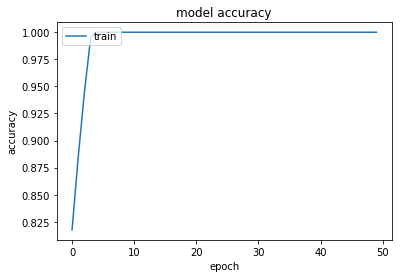

In [57]:
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

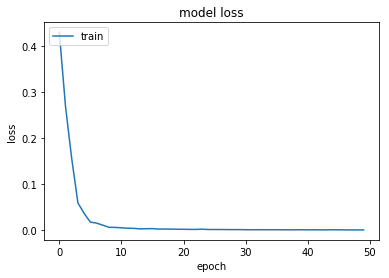

In [58]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [194]:
#predictions

parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level2/Level2/tech_mix/Anoopanandan.doc")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level2/nontech_mix/Aravind Kema.doc")
#parsedPDF = parser.from_file("/home/shabna/Desktop/example_codes/new_sample/level5/developer/dotnet/Snehalaltv  .pdf")

contents=[clean_doc(parsedPDF['content'])]
            #print (jd_contents)
print(contents)

['anupama oppcivilstation mahe  673310 tel 9847857877 email anoopn44gmailcom anoopnandanan objective seeking position organization utilize innovative creative skills sincere efforts towards growth development organization time developing become good leader challenging organization education bahelor multimedia communication  2011 2014  vismayam college art media  affiliated university calicut diploma graphic designing advertising dept research  training sector higher secondary  state board kerala jnghss mahe experience web designer  june 2014 present  mentor performance rating pvt ltd  calicut job includes web page psd designing html conversion graphic designing etc graphic designer  april 2004 june 2011  job profile worked graphic designer multi colour offset printing press owned father job includes graphic designing layout designing proof reading colour laser printing projects wwwsharp409asoftwarecom wwwpelabocom wwwradiantjewelsin wwwmentorgoldcom wwwemeraldinspirationscom online por

In [195]:
def prpInput(pp):
    tx = Tokenizer()
    tx.fit_on_texts(pp)
    vocab_size = len(tx.word_index)+1
    encoded_docs = tx.texts_to_sequences(pp)
    max_length = 250
    padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    return padded_docs

In [196]:
mat=prpInput(contents)
mat

array([[ 18,  19,   7,  20,  21,  22,  23,  24,  25,  26,  27,  28,   3,
         29,  30,  31,  32,  33,  34,  35,  36,  37,   3,  38,  39,  40,
         41,  42,  43,   3,  44,  45,  46,  47,   8,   9,  48,  49,  50,
         51,  52,  53,  10,  54,   2,   1,  55,  56,  57,  58,  59,  60,
         61,  62,  63,  64,  65,   7,  66,   4,   5,  11,   9,  67,  68,
         69,  70,  71,  72,  10,   6,  12,   4,  13,  73,   1,  74,  75,
          2,   1,  76,   2,   5,  77,  78,  11,   8,   6,  79,  80,   2,
          5,  81,  14,  82,  15,  83,  84,  85,   6,  12,   2,   1,  86,
          1,  87,  16,  14,  88,  15,  89,  90,  91,  92,  93,  94,  95,
         96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
        109,   1, 110,  17, 111,  17, 112,   4, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134,  16, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151

In [197]:
prd = model.predict(mat)


In [198]:
labels_index = {'Technical field':0 ,'Non-Technical field':1}
rev_lable_index = {}
for key in labels_index:
    rev_lable_index[labels_index[key]] = key
print(rev_lable_index)
def result(prd,contents):
    y_classes = prd.argmax(axis=-1)
    print(len(y_classes))
    lx=[]
    for idx,lb in enumerate(y_classes):
        lx.append([contents[idx],rev_lable_index[lb]])
    return lx

{0: 'Technical field', 1: 'Non-Technical field'}


In [199]:
result(prd,contents)

1


[['anupama oppcivilstation mahe  673310 tel 9847857877 email anoopn44gmailcom anoopnandanan objective seeking position organization utilize innovative creative skills sincere efforts towards growth development organization time developing become good leader challenging organization education bahelor multimedia communication  2011 2014  vismayam college art media  affiliated university calicut diploma graphic designing advertising dept research  training sector higher secondary  state board kerala jnghss mahe experience web designer  june 2014 present  mentor performance rating pvt ltd  calicut job includes web page psd designing html conversion graphic designing etc graphic designer  april 2004 june 2011  job profile worked graphic designer multi colour offset printing press owned father job includes graphic designing layout designing proof reading colour laser printing projects wwwsharp409asoftwarecom wwwpelabocom wwwradiantjewelsin wwwmentorgoldcom wwwemeraldinspirationscom online po

In [200]:
import pandas as pd
pd.DataFrame(result(prd,contents),columns=['File Content','Label'])

1


,File Content,Label
0,anupama oppcivilstation mahe 673310 tel 98478...,Technical field
